In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


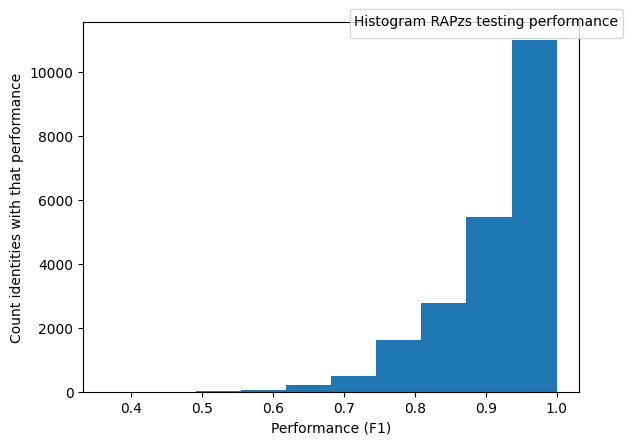

In [2]:
pathToTestingMetricF1 = 'RAPzs/training_dict_instance_f1.json'
pathToSave = 'RAPzs/'
pathToTestingDataGTPredicted = 'RAPzs/training_dict_gt_predicted.json'

fileTestingMetricF1 = open(pathToTestingMetricF1)
jsonTestingMetricF1 = json.load(fileTestingMetricF1)

values = jsonTestingMetricF1['training f1']

listNames = []
for list in jsonTestingMetricF1['img name training']:
    for item in list:
        listNames.append(item)

dfTrainingRAPzs = pd.DataFrame()
dfTrainingRAPzs['values'] = values
dfTrainingRAPzs['name'] = listNames

plt.hist(dfTrainingRAPzs['values'])
plt.xlabel('Performance (F1)')
plt.ylabel('Count identities with that performance')
tittle='Histogram RAPzs testing performance'
plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
plt.show() 


maxIdentities = 5
pd.options.display.max_colwidth = 100
listNameValueWorst = dfTrainingRAPzs[dfTrainingRAPzs['values']<0.4][0:maxIdentities]['values'].tolist()
listNameImgWorst = dfTrainingRAPzs[dfTrainingRAPzs['values']<0.4][0:maxIdentities]['name'].tolist()
listNameIndexWorst = dfTrainingRAPzs[dfTrainingRAPzs['values']<0.4][0:maxIdentities].index.tolist()

listNameValueBest = dfTrainingRAPzs[dfTrainingRAPzs['values']>0.9][0:maxIdentities]['values'].tolist()
listNameImgBest = dfTrainingRAPzs[dfTrainingRAPzs['values']>0.9][0:maxIdentities]['name'].tolist()
listNameIndexBest = dfTrainingRAPzs[dfTrainingRAPzs['values']>0.9][0:maxIdentities].index.tolist()


fileTestingGTPredicted = open(pathToTestingDataGTPredicted)
jsonTestingGTPredicted = json.load(fileTestingGTPredicted)

valuesGT = jsonTestingGTPredicted['training gt']
valuesPredicted = jsonTestingGTPredicted['training predicted']

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

listAttributesRAPzs.remove('Age46-60')

columnsDF = ['value F1', 'nameImg']

for item in listAttributesRAPzs:
    columnsDF.append(item + " gt")

for item in listAttributesRAPzs:
    columnsDF.append(item + " predicted")


fillList = ['-'] * len(listAttributesRAPzs)
dfWorst = pd.DataFrame(columns=columnsDF)
for name, index in zip(listNameImgWorst, listNameIndexWorst):
    value = listNameValueWorst[listNameImgWorst.index(name)]
    newRow = [value, name]
    
    #valuesGT[index] = [True if x==1.0 else False for x in valuesGT[index]]

    for gt_num in valuesGT[index]:
        newRow.append(gt_num)


    for predicted_num in valuesPredicted[index]:
        newRow.append(predicted_num)
    
    dfWorst.loc[-1] = newRow
    dfWorst.index = dfWorst.index + 1
    dfWorst = dfWorst.sort_index()

    xnorRow = [value, name]

    diffGTPredicted = [(gt - predicted) for gt, predicted in zip(valuesGT[index], valuesPredicted[index])]
    
    # this row is the difference between the gt and the predicted
    xnorRow.extend(diffGTPredicted)
    xnorRow.extend(fillList)

    dfWorst.loc[-1] = xnorRow
    dfWorst.index = dfWorst.index + 1
    dfWorst = dfWorst.sort_index()

dfWorst.to_csv(pathToSave+"worstidentitiestraining.csv")


dfBest = pd.DataFrame(columns=columnsDF)
for name, index in zip(listNameImgBest, listNameIndexBest):
    value = listNameValueBest[listNameImgBest.index(name)]
    newRow = [value, name]
    
    for gt_num in valuesGT[index]:
        newRow.append(gt_num)

    for predicted_num in valuesPredicted[index]:
        newRow.append(predicted_num)
    
    
    dfBest.loc[-1] = newRow
    dfBest.index = dfBest.index + 1
    dfBest = dfBest.sort_index()

dfBest.to_csv(pathToSave+"bestidentitiestraining.csv")

In [2]:
pathToTestingMetricF1 = 'RAPzs/testing_dict_instance_f1.json'

fileTestingMetricF1 = open(pathToTestingMetricF1)
jsonTestingMetricF1 = json.load(fileTestingMetricF1)

values = jsonTestingMetricF1['testing f1']

listNames = []
for list in jsonTestingMetricF1['img name testing']:
    for item in list:
        listNames.append(item)

dfTestingRAPzs = pd.DataFrame()
dfTestingRAPzs['values'] = values
dfTestingRAPzs['name'] = listNames



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


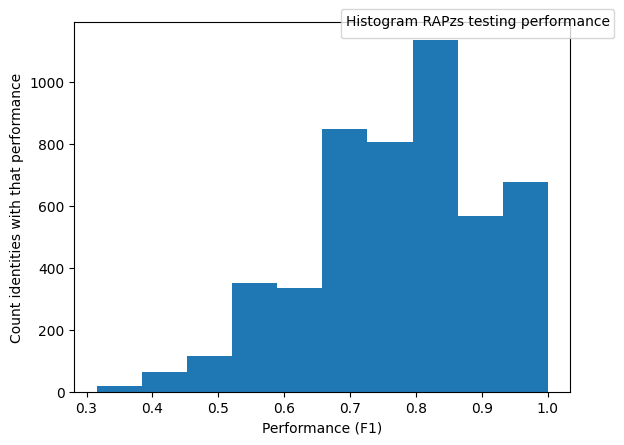

In [3]:
plt.hist(dfTestingRAPzs['values'])
plt.xlabel('Performance (F1)')
plt.ylabel('Count identities with that performance')
tittle='Histogram RAPzs testing performance'
plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
plt.show() 

In [4]:
maxIdentities = 5
pd.options.display.max_colwidth = 100
listNameValueWorst = dfTestingRAPzs[dfTestingRAPzs['values']<0.4][0:maxIdentities]['values'].tolist()
listNameImgWorst = dfTestingRAPzs[dfTestingRAPzs['values']<0.4][0:maxIdentities]['name'].tolist()
listNameIndexWorst = dfTestingRAPzs[dfTestingRAPzs['values']<0.4][0:maxIdentities].index.tolist()

In [5]:
listNameValueBest = dfTestingRAPzs[dfTestingRAPzs['values']>0.9][0:maxIdentities]['values'].tolist()
listNameImgBest = dfTestingRAPzs[dfTestingRAPzs['values']>0.9][0:maxIdentities]['name'].tolist()
listNameIndexBest = dfTestingRAPzs[dfTestingRAPzs['values']>0.9][0:maxIdentities].index.tolist()

In [6]:
pathToTestingDataGTPredicted = 'RAPzs/testing_dict_gt_predicted.json'
fileTestingGTPredicted = open(pathToTestingDataGTPredicted)
jsonTestingGTPredicted = json.load(fileTestingGTPredicted)

In [7]:
valuesGT = jsonTestingGTPredicted['testing gt']
valuesPredicted = jsonTestingGTPredicted['testing predicted']

In [17]:
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

listAttributesRAPzs.remove('Age46-60')

columnsDF = ['value F1', 'nameImg']

for item in listAttributesRAPzs:
    columnsDF.append(item + " gt")

for item in listAttributesRAPzs:
    columnsDF.append(item + " predicted")

In [18]:
fillList = ['-'] * len(listAttributesRAPzs)
dfWorst = pd.DataFrame(columns=columnsDF)
for name, index in zip(listNameImgWorst, listNameIndexWorst):
    value = listNameValueWorst[listNameImgWorst.index(name)]
    newRow = [value, name]
    
    #valuesGT[index] = [True if x==1.0 else False for x in valuesGT[index]]

    for gt_num in valuesGT[index]:
        newRow.append(gt_num)


    for predicted_num in valuesPredicted[index]:
        newRow.append(predicted_num)
    
    dfWorst.loc[-1] = newRow
    dfWorst.index = dfWorst.index + 1
    dfWorst = dfWorst.sort_index()

    xnorRow = [value, name]

    diffGTPredicted = [(gt - predicted) for gt, predicted in zip(valuesGT[index], valuesPredicted[index])]
    
    # this row is the difference between the gt and the predicted
    xnorRow.extend(diffGTPredicted)
    xnorRow.extend(fillList)

    dfWorst.loc[-1] = xnorRow
    dfWorst.index = dfWorst.index + 1
    dfWorst = dfWorst.sort_index()


In [19]:
pathToSave = 'RAPzs/'

In [20]:
dfWorst.to_csv(pathToSave+"worstidentities.csv")

In [21]:
dfWorst

,value F1,nameImg,hs-BaldHead gt,hs-LongHair gt,hs-BlackHair gt,hs-Hat gt,hs-Glasses gt,ub-Shirt gt,ub-Sweater gt,ub-Vest gt,...,Employee predicted,action-Calling predicted,action-Talking predicted,action-Gathering predicted,action-Holding predicted,action-Pushing predicted,action-Pulling predicted,action-CarryingByArm predicted,action-CarryingByHand predicted,action-Other predicted
0,0.363636,CAM22-2014-03-03-20140303132633-20140303133221-tarid15-frame559-line2.png,0,0,0,0,0,1,0,0,...,-,-,-,-,-,-,-,-,-,-
1,0.363636,CAM22-2014-03-03-20140303132633-20140303133221-tarid15-frame559-line2.png,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.375000,CAM22-2014-03-10-20140310130758-20140310131350-tarid96-frame637-line2.png,0,0,0,0,0,0,0,0,...,-,-,-,-,-,-,-,-,-,-
3,0.375000,CAM22-2014-03-10-20140310130758-20140310131350-tarid96-frame637-line2.png,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.352941,CAM28-2014-02-26-20140226114726-20140226115846-tarid93-frame5601-line1.png,0,0,0,0,0,0,-1,0,...,-,-,-,-,-,-,-,-,-,-
5,0.352941,CAM28-2014-02-26-20140226114726-20140226115846-tarid93-frame5601-line1.png,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0.375000,CAM29-2014-02-26-20140226113609-20140226114157-tarid656-frame2941-line1.png,0,0,0,0,-1,0,0,0,...,-,-,-,-,-,-,-,-,-,-
7,0.375000,CAM29-2014-02-26-20140226113609-20140226114157-tarid656-frame2941-line1.png,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,0.400000,CAM31-2014-02-15-20140215163058-20140215163550-tarid3-frame210-line1.png,0,0,0,0,0,0,0,1,...,-,-,-,-,-,-,-,-,-,-
9,0.400000,CAM31-2014-02-15-20140215163058-20140215163550-tarid3-frame210-line1.png,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
dfBest = pd.DataFrame(columns=columnsDF)
for name, index in zip(listNameImgBest, listNameIndexBest):
    value = listNameValueBest[listNameImgBest.index(name)]
    newRow = [value, name]
    
    for gt_num in valuesGT[index]:
        newRow.append(gt_num)

    for predicted_num in valuesPredicted[index]:
        newRow.append(predicted_num)
    
    
    dfBest.loc[-1] = newRow
    dfBest.index = dfBest.index + 1
    dfBest = dfBest.sort_index()

In [14]:
dfBest

,value F1,nameImg,hs-BaldHead gt,hs-LongHair gt,hs-BlackHair gt,hs-Hat gt,hs-Glasses gt,ub-Shirt gt,ub-Sweater gt,ub-Vest gt,...,Employee predicted,action-Calling predicted,action-Talking predicted,action-Gathering predicted,action-Holding predicted,action-Pushing predicted,action-Pulling predicted,action-CarryingByArm predicted,action-CarryingByHand predicted,action-Other predicted
0,0.909091,CAM31-2014-03-05-20140305110503-20140305111119-tarid154-frame3137-line1.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.941176,CAM31-2014-03-10-20140310130039-20140310130643-tarid105-frame2981-line1.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1.000000,CAM31-2014-03-10-20140310130039-20140310130643-tarid155-frame3975-line1.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.941176,CAM31-2014-03-10-20140310130643-20140310131259-tarid66-frame2173-line1.png,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1.000000,CAM31-2014-03-12-20140312173621-20140312174217-tarid68-frame2063-line1.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [15]:
dfBest.to_csv(pathToSave+"bestidentities.csv")